In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import airy
from scipy.optimize import brentq
from scipy.linalg import *

In [2]:
#konstante
V0 = 0.05
a = 1.3

AA=8.6375   #m/hbar
BB=13.12     #m/hbar**2
hbar=AA/BB
m=AA*hbar

In [3]:
#potencijal
def V(x):
    k = np.floor(x/(2*a))
    return V0/a*(np.abs(x-(2*k+1)*a)-a)

# Analitički

In [4]:
#analitičko rješenje:

def uvjet_vrpce(E):
    gamma = -(2*m*a**2/hbar**2/V0**2)**(1/3)*(V0+E)
    lam = -E*(2*m*a**2/hbar**2/V0**2)**(1/3)
    p = airy(gamma)
    q = airy(lam)
    Aiy = p[0]
    dAiy = p[1]
    Biy = p[2]
    dBiy = p[3]
    Ail = q[0]
    dAil = q[1]
    Bil = q[2]
    dBil = q[3]
    f1 = Biy*dBiy*Ail*dAil + Aiy*dAiy*Bil*dBil
    f2 = Ail*dBil + Bil*dAil
    f3 = Aiy*dBiy + Biy*dAiy
    f4 = Ail*dBil - Bil*dAil
    f5 = Aiy*dBiy - Biy*dAiy
    return np.abs(2*f1-f2*f3)/np.abs(f4*f5)

In [5]:
energija = np.arange(-0.05, 0.08, 0.000001)
uvjet = [uvjet_vrpce(e) for e in energija]

Text(0.5, 1.0, 'uvjeti energije - najniža vrpca')

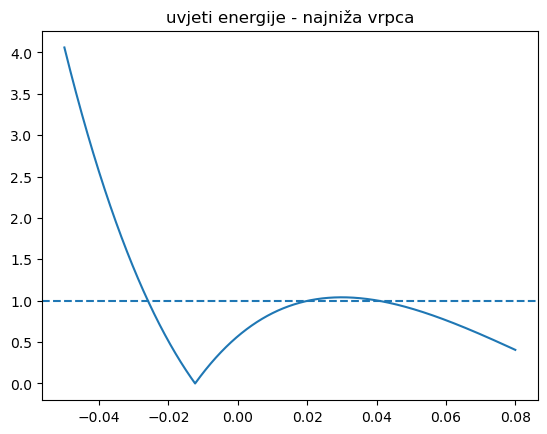

In [6]:
plt.plot(energija, uvjet)
plt.axhline(y=1, ls='--')
plt.title('uvjeti energije - najniža vrpca')

Text(0.5, 1.0, 'energije')

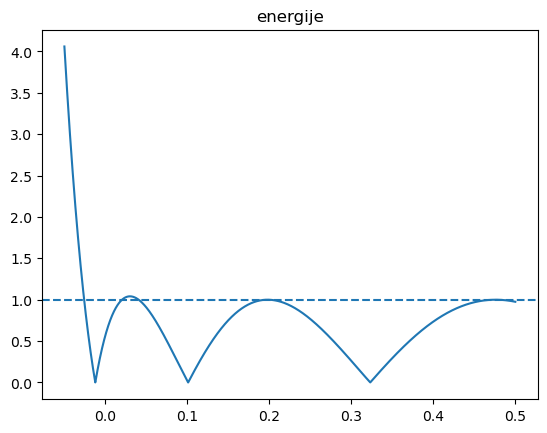

In [7]:
energija = np.arange(-0.05, 0.5, 0.0001)
uvjet = [uvjet_vrpce(e) for e in energija]
plt.plot(energija, uvjet)
plt.axhline(y=1, ls='--')
plt.title('energije')

In [8]:
def raspon_vrpce(E):
    return uvjet_vrpce(E) - 1

In [9]:
E1min = brentq(raspon_vrpce, -0.04, -0.02)
E1max = brentq(raspon_vrpce, -0.02, 0.03)

E2min = brentq(raspon_vrpce, 0.03, 0.06)
E2max = brentq(raspon_vrpce, 0.1, 0.198)

E3min = brentq(raspon_vrpce, 0.198, 0.2)
E3max = brentq(raspon_vrpce, 0.2, 0.475)

E4min = brentq(raspon_vrpce, 0.475, 0.5)

# Numerika

In [10]:
#numerika - periodični rubni uvjeti:

N_jama = 26
L = N_jama*2*a
Nsub = 1024
dx = L/Nsub
Xmin = -L/2
Xmax = L/2

u = hbar**2/m/2/dx**2
d = hbar**2/m/dx**2

In [11]:
xmesh = np.arange(Xmin, Xmax + dx/2, dx)
Npts = len(xmesh)
V_x=np.zeros([Npts],float)


In [12]:
for i in range(0,Npts,1):
    xval=xmesh[i]
    V_x[i] = V(xval)


In [13]:
ham=np.zeros([Npts-2,Npts-2],float)

for i in range(0,Npts-2,1):
    ham[i,i]=V_x[i+1]+d
for i in range(0,Npts-3,1):
    ham[i+1,i]=-u
for i in range(0,Npts-3,1):
    ham[i,i+1]=-u

ham[Npts-3,0]=-u
ham[0,Npts-3]=-u

eigen,v=eig(ham)
reigen=eigen.real
indices=reigen.argsort()

# Perturbacija

In [15]:
#perturbativni dio:

def Vn(n):   #članovi u Fourierovom redu
    if n==0:
        return -V0/2
    elif n%2 == 0:
        return 0
    else:
        return 2*V0/n**2/np.pi**2

In [16]:
print('Energija najnižeg stanja prve vrpce:\n')

print('analitički:  ', E1min)
print('numerički:  ', reigen[indices[0]])

#perturbativno:
k = 0
print('pertubativno - popravka prvog reda:  ', Vn(0))

suma = 0
for n in range(0, 10):
    suma += -1/(2*n+1)**2/np.pi**2*4*a**2*(Vn(2*n+1))**2
    
print('perturbativno - popravka drugog reda:   ', Vn(0) + m/hbar*suma)

Energija najnižeg stanja prve vrpce:

analitički:   -0.02592066804960941
numerički:   -0.0259486881148844
pertubativno - popravka prvog reda:   -0.025
perturbativno - popravka drugog reda:    -0.025608223939587258


In [17]:
print('Razmak između najniže moguće energija(-V0) i prve vrpce:\n')

print('analitički:  ', np.abs(E1min + V0))
print('numerički:  ', np.abs(reigen[indices[0]] + V0))
print('perturbativno - prvi red:  ', np.abs(Vn(0) + V0))
print('perturbativno - drugi red:  ', np.abs(Vn(0) + m/hbar*suma + V0))

Razmak između najniže moguće energija(-V0) i prve vrpce:

analitički:   0.02407933195039059
numerički:   0.0240513118851156
perturbativno - prvi red:   0.025
perturbativno - drugi red:   0.024391776060412745


In [18]:
print('Energija najvišeg stanja prve vrpce:\n')


k = np.pi/2/a
print('analitički:  ', E1max)
print('numerički:  ', reigen[indices[N_jama - 1]])
print(r"perturbativno ovo odgovara vrijednosti k = \pi/(2a), nižoj popravci degenerirane energije")
print('perturbativno:  ', hbar**2/2/m*k**2 + Vn(0) - np.abs(Vn(1)))

Energija najvišeg stanja prve vrpce:

analitički:   0.020280278089632644
numerički:   0.02035425184766613
perturbativno ovo odgovara vrijednosti k = \pi/(2a), nižoj popravci degenerirane energije
perturbativno:   0.02050815034951322


In [19]:
print('Energija najnižeg stanja druge vrpce:\n')


k = np.pi/2/a
print('analitički:  ', E2min)
print('numerički:  ', reigen[indices[N_jama]])
print(r"perturbativno ovo odgovara vrijednosti k = \pi/(2a), višoj popravci degenerirane energije")
print('perturbativno:  ', hbar**2/2/m*k**2 + Vn(0) + np.abs(Vn(1)))

Energija najnižeg stanja druge vrpce:

analitički:   0.04053599251280401
numerički:   0.04057610776917736
perturbativno ovo odgovara vrijednosti k = \pi/(2a), višoj popravci degenerirane energije
perturbativno:   0.040772387077980775


In [20]:
print('Razmak između prve i druge vrpce:\n')
print('analitički:  ', E2min - E1max)
print('numerički:  ', reigen[indices[N_jama]] - reigen[indices[N_jama-1]])
print('perturbativno:  ', 2*Vn(1))

Razmak između prve i druge vrpce:

analitički:   0.020255714423171364
numerički:   0.020221855921511232
perturbativno:   0.020264236728467555


In [21]:
print('Energija najvišeg stanja druge vrpce:\n')
print('analitički:  ', E2max)
print('numerički:  ', reigen[indices[N_jama*2-1]])

Energija najvišeg stanja druge vrpce:

analitički:   0.19743944016282683
numerički:   0.19737766853254168


In [22]:
print('Energija najnižeg stanja treće vrpce:\n')
print('analitički:  ', E3min)
print('numerički:  ', reigen[indices[N_jama*2]])

Energija najnižeg stanja treće vrpce:

analitički:   0.19828980195384557
numerički:   0.19822267126500862


In [23]:
print('Razmak između druge i treće vrpce:\n')
print('analitički:  ', E3min - E2max)
print('numerički:  ', reigen[indices[N_jama*2]] - reigen[indices[N_jama*2-1]])

Razmak između druge i treće vrpce:

analitički:   0.0008503617910187444
numerički:   0.0008450027324669318


In [24]:
print('Objašnjenje:\n')
print('Ovaj rezultat za razmak druge i treće vrpce nismo uspjeli dobiti perturbativno.')
print('Ako bi pogledali sljedeću točku gdje perturbativno imamo degeneraciju, to bi bila 3\pi/(2a), to odgovara razmaku treće i \nčetvrte(kao što ćemo kasnije vidjeti)')
print('Ako bismo htjeli dobiti ove vrpce perturbativno, morali bismo ići u više redove računa smetnje - trade off jednostavnosti je \ngubitak nekih informacija')
print()
print('Analitički vidimo da te vrpce ipak postaje, čak i za jako malo smetnju, no razmak između njih')
print('kod male vrpce je jako malen, manji od razmake prve i druge ili treće i četvrte\n')

print('Naivno bi mogli reći da i numerika daje točne rezultate, tj. drugu i treću vrpcu, no kao što ću sada pokazati,')
print('numerika zapravo ne razlučuje između tih dviju vrpca')

Objašnjenje:

Ovaj rezultat za razmak druge i treće vrpce nismo uspjeli dobiti perturbativno.
Ako bi pogledali sljedeću točku gdje perturbativno imamo degeneraciju, to bi bila 3\pi/(2a), to odgovara razmaku treće i 
četvrte(kao što ćemo kasnije vidjeti)
Ako bismo htjeli dobiti ove vrpce perturbativno, morali bismo ići u više redove računa smetnje - trade off jednostavnosti je 
gubitak nekih informacija

Analitički vidimo da te vrpce ipak postaje, čak i za jako malo smetnju, no razmak između njih
kod male vrpce je jako malen, manji od razmake prve i druge ili treće i četvrte

Naivno bi mogli reći da i numerika daje točne rezultate, tj. drugu i treću vrpcu, no kao što ću sada pokazati,
numerika zapravo ne razlučuje između tih dviju vrpca


In [25]:
print('Numerička rješenja blizu procijepa druge i treće vrpce:\n')

print('Pogledat ćemo nekoliko numeričkih energija blizu kraja druge vrpce i početka treće te njihov razmak\n')

print(reigen[indices[N_jama*2-3]], reigen[indices[N_jama*2-2]], '\nNajviša energija druge vrpce:', reigen[indices[N_jama*2-1]])
print("Najniža energija treće vrpce:", reigen[indices[N_jama*2]], "\n", reigen[indices[N_jama*2+1]], reigen[indices[N_jama*2+2]])


print('\nProcijep između vrpca:', reigen[indices[N_jama*2]] - reigen[indices[N_jama*2-1]])
print('\nRazlike susjednih energija:')
print(reigen[indices[N_jama*2-2]] - reigen[indices[N_jama*2-3]])
print(reigen[indices[N_jama*2-1]] - reigen[indices[N_jama*2-2]])
print(reigen[indices[N_jama*2+1]] - reigen[indices[N_jama*2]])
print(reigen[indices[N_jama*2+2]] - reigen[indices[N_jama*2+1]])

print('\nVidimo da numerika ne razlikuje procijep između dvije različite vrpce od razlike susjednih energija iste vrpce')
print('Razlog je konačna preciznost numeričke metode')

Numerička rješenja blizu procijepa druge i treće vrpce:

Pogledat ćemo nekoliko numeričkih energija blizu kraja druge vrpce i početka treće te njihov razmak

0.18106320336461043 0.1810848472962133 
Najviša energija druge vrpce: 0.19737766853254168
Najniža energija treće vrpce: 0.19822267126500862 
 0.21517491287741844 0.21519070288829253

Procijep između vrpca: 0.0008450027324669318

Razlike susjednih energija:
2.164393160286604e-05
0.016292821236328386
0.016952241612409824
1.579001087409493e-05

Vidimo da numerika ne razlikuje procijep između dvije različite vrpce od razlike susjednih energija iste vrpce
Razlog je konačna preciznost numeričke metode


In [26]:
print('Najviša energija treće vrpce:\n')


k = 3*np.pi/2/a
print('Analitički:  ', E3max)
print('Numerički:  ', reigen[indices[N_jama*3-1]])
print(r"perturbativno ovo odgovara vrijednosti k = 3*\pi/(2a), nižoj popravci degenerirane energije")
print('perturbativno:  ', hbar**2/2/m*k**2 + Vn(0) - np.abs(Vn(3)))

Najviša energija treće vrpce:

Analitički:   0.47474750959893
Numerički:   0.47331808638763856
perturbativno ovo odgovara vrijednosti k = 3*\pi/(2a), nižoj popravci degenerirane energije
perturbativno:   0.4746366274943637


In [27]:
print('Najniža energija četvrte vrpce:\n')


k = 3*np.pi/2/a
print('Analitički:  ', E4min)
print('Numerički:  ', reigen[indices[N_jama*3]])
print(r"perturbativno ovo odgovara vrijednosti k = 3*\pi/(2a), višoj popravci degenerirane energije")
print('perturbativno:  ', hbar**2/2/m*k**2 + Vn(0) + np.abs(Vn(3)))

Najniža energija četvrte vrpce:

Analitički:   0.47700712424700215
Numerički:   0.47555529796670976
perturbativno ovo odgovara vrijednosti k = 3*\pi/(2a), višoj popravci degenerirane energije
perturbativno:   0.47688820935308235


In [28]:
print('Procijep treće i četvrte vrpce:\n')

print('Analitički: ', E4min - E3max)
print('Numerički:  ', reigen[indices[3*N_jama]] - reigen[indices[3*N_jama-1]])
print('Perturbativno:  ', 2*np.abs(Vn(3)))

Procijep treće i četvrte vrpce:

Analitički:  0.0022596146480721724
Numerički:   0.0022372115790711966
Perturbativno:   0.0022515818587186174


S porastom rednog broja vrpce, procjepi između vrpci se smanjuju, dok na kraju ne bi došli do beskonačne vrpce, tj. kontinuuma.
To perturbativno vidimo tako da pogledamo članove Fourierovog razvoja.
Procijepi odgovaraju neparnim članovima, počevši od člana n=1
Članovi su proporcionalni s 1/n^2 pa se povećanjem n smanjuje iznos člana, tj.
najzastupljeniji su najniži članovi, dok su članovi viših frekvencija manje zastupljeni.
Dakle članovi se smanjuju s porastom n, odnosno razmak se smanjuje s porastom rednog broja vrpce.
U limesu n je beskonačno, članovi su 0, imamo jednu kontinuiranu vrpcu.

<br>
To se može vidjeti i analitički gledajući graf energija. Naravno, analitički dobivamo malo kompliciranije ponašanje
od onog perturbativnog(kao na primjer druga i treća vrpca, što je već komentirano), no zaključak ostaje da će se razmaci vrpca
smanjivati, iako možda ne uniformno kao što račun smetnje predviđa.
